In [29]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt

from tqdm.notebook import tqdm
from glob import glob

import datetime

<AxesSubplot:xlabel='time'>

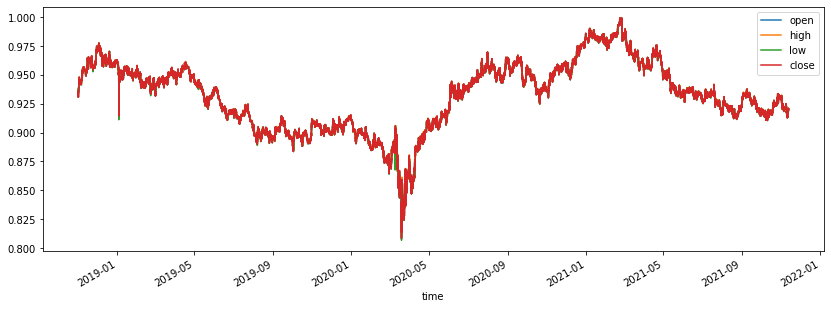

In [15]:
data_path = glob('zip_data/*.csv')[0]
data = pd.read_csv(data_path, index_col=0)
data.index = pd.to_datetime(data.index)
data.plot(figsize=(14,5))

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/623 [00:00<?, ?it/s]

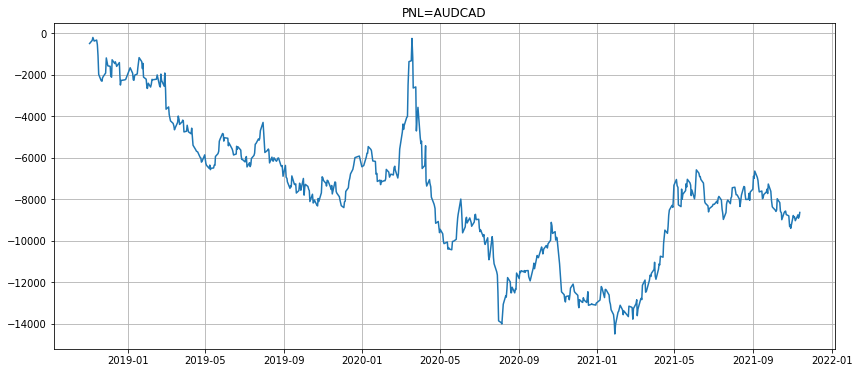

  0%|          | 0/623 [00:00<?, ?it/s]

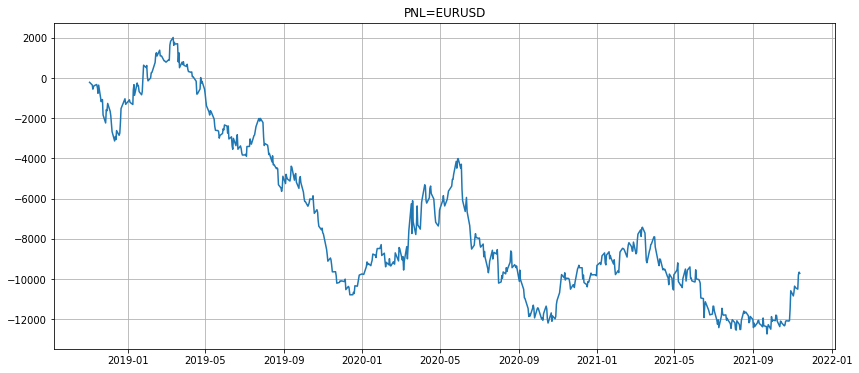

  0%|          | 0/623 [00:00<?, ?it/s]

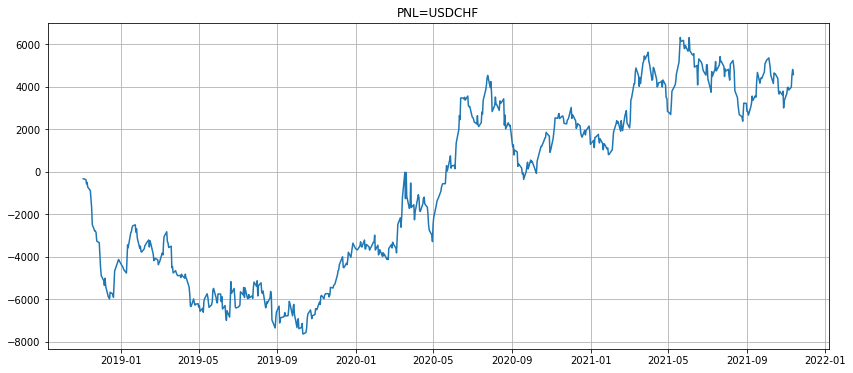

0it [00:00, ?it/s]

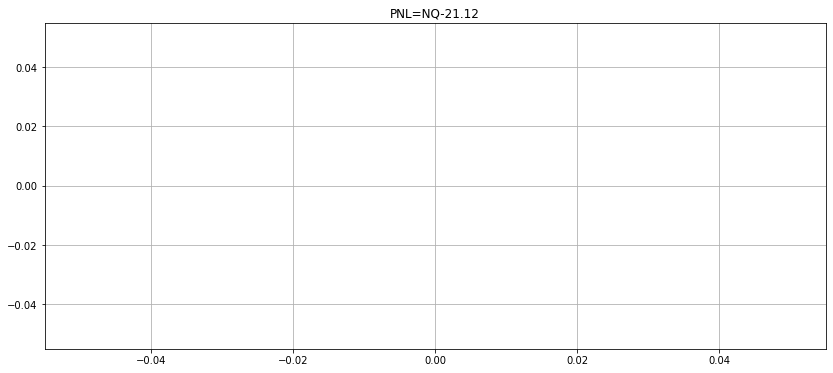

  0%|          | 0/623 [00:00<?, ?it/s]

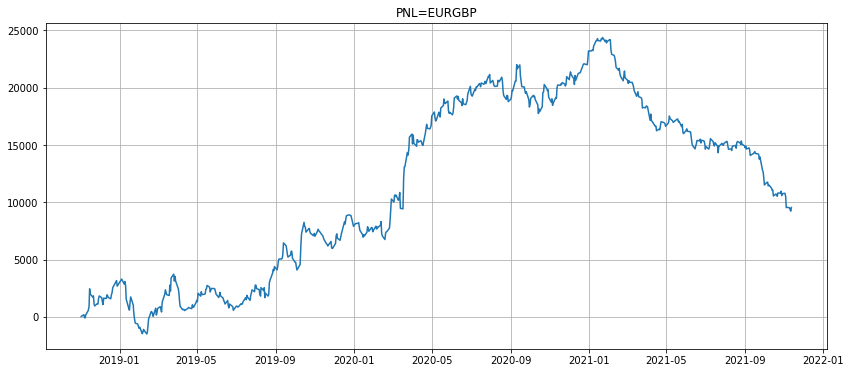

  0%|          | 0/623 [00:00<?, ?it/s]

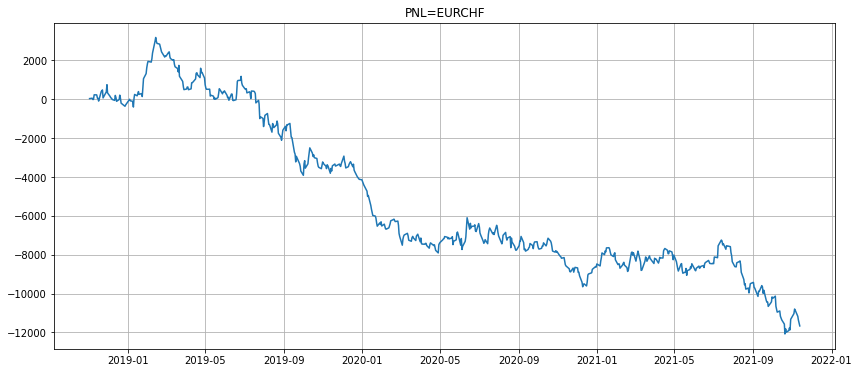

  0%|          | 0/619 [00:00<?, ?it/s]

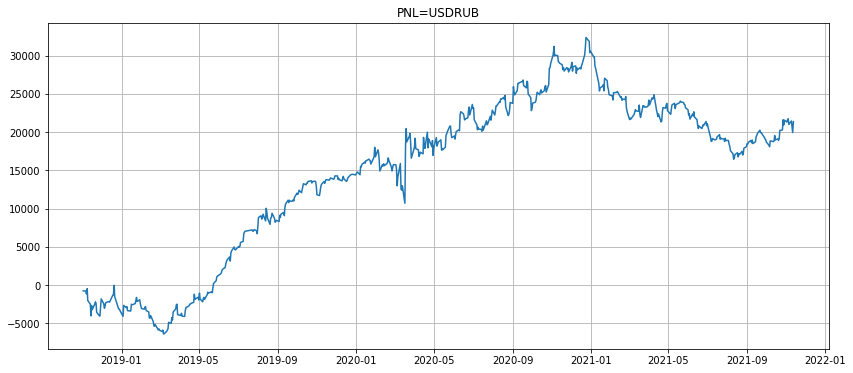

  0%|          | 0/623 [00:00<?, ?it/s]

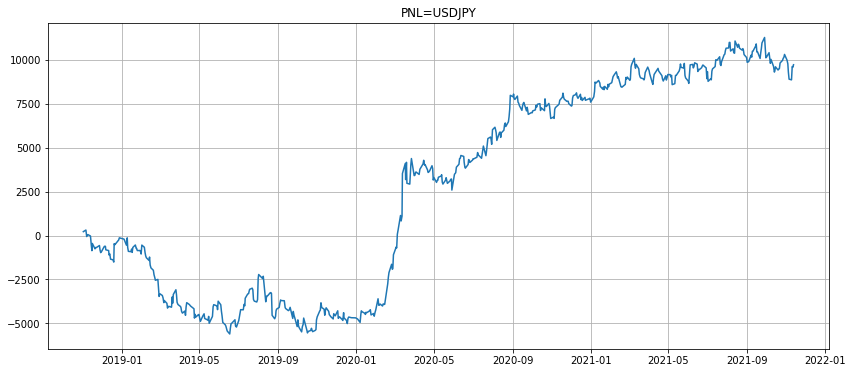

  0%|          | 0/607 [00:00<?, ?it/s]

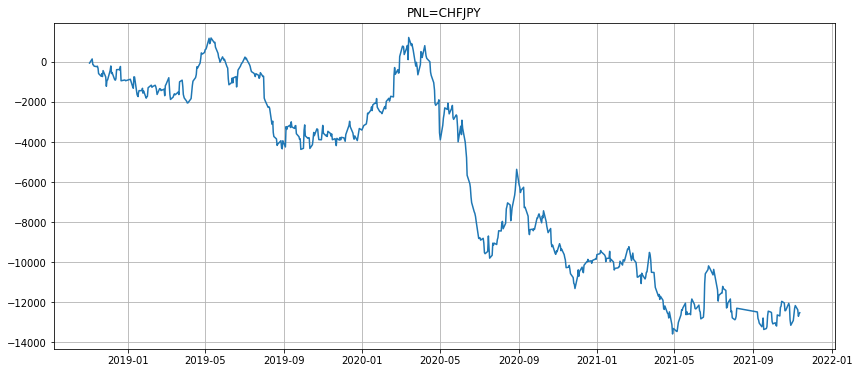

  0%|          | 0/601 [00:00<?, ?it/s]

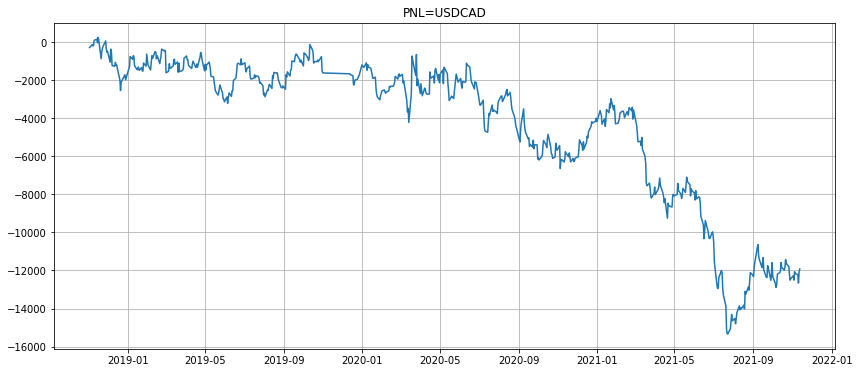

  0%|          | 0/76 [00:00<?, ?it/s]

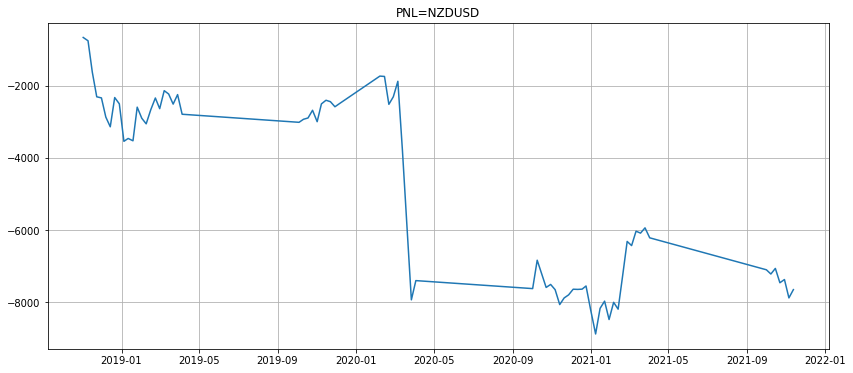

  0%|          | 0/620 [00:00<?, ?it/s]

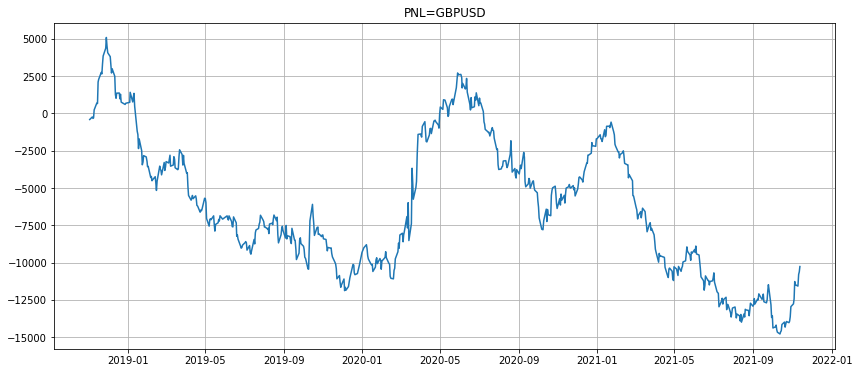

  0%|          | 0/623 [00:00<?, ?it/s]

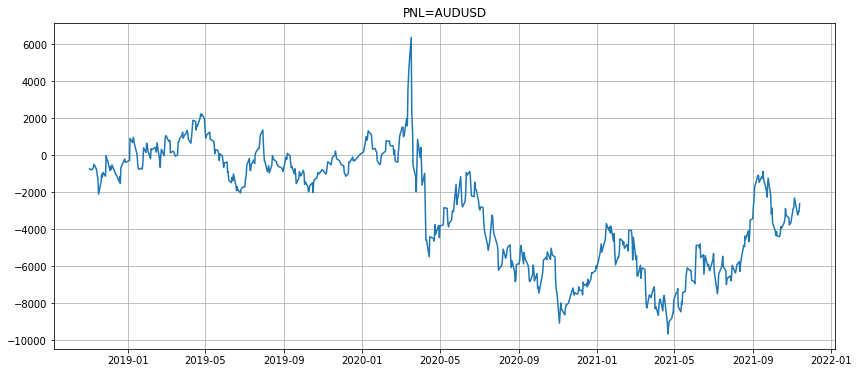

  0%|          | 0/623 [00:00<?, ?it/s]

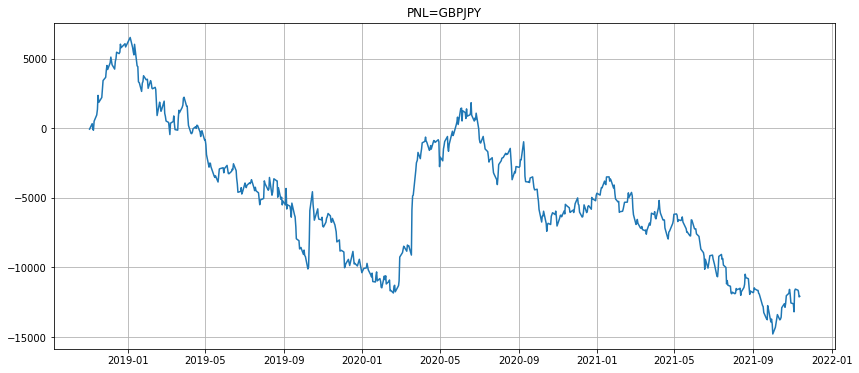

In [93]:
MONEY = list()
MONEY.append(0)
TRADE_LOGIC = list()
TRADE_DATES = list()


POSITION_VOLUME = 100_000
SLIPADGE = 10

data_path = glob('zip_data/*.csv')

for _file_ in tqdm(data_path):


    MONEY = list()
    MONEY.append(0)
    TRADE_LOGIC = list()
    TRADE_DATES = list()


    data = pd.read_csv(_file_, index_col=0)
    data.index = pd.to_datetime(data.index)
    AVAILABLE_DATES = list()
    name = _file_.split('/')[1][:-4]

    if name != ('ES-21.12' or ' NQ-21.12'):
        for _ in np.unique(data.index.date):
            ASIAN_START = datetime.datetime.combine(_, datetime.time(hour=22))
            ASIAN_END = datetime.datetime.combine(_ + datetime.timedelta(days=1), datetime.time(hour=8))
            ENGLISH_END = datetime.datetime.combine(_ + datetime.timedelta(days=1), datetime.time(hour=22))

            if (ASIAN_START in data.index) and (ASIAN_END in data.index) and (ENGLISH_END in data.index):
                AVAILABLE_DATES.append(_)


        for _ in tqdm(AVAILABLE_DATES, leave=False):
            #if _ + datetime.timedelta(days=1) in AVAILABLE_DATES:

            ASIAN_START = datetime.datetime.combine(_, datetime.time(hour=22))
            ASIAN_END = datetime.datetime.combine(_ + datetime.timedelta(days=1), datetime.time(hour=8))
            ENGLISH_END = datetime.datetime.combine(_ + datetime.timedelta(days=1), datetime.time(hour=22))
            ASIAN_DATA = data.loc[ASIAN_START:ASIAN_END]

            HOLD_DATA = data.loc[ASIAN_END:ENGLISH_END]

            LOW = ASIAN_DATA.close.min()
            MAX = ASIAN_DATA.close.max()

            CLOSE = HOLD_DATA.iloc[-1].close
            for _arrow_ in HOLD_DATA.index:
                current_price = HOLD_DATA.loc[_arrow_].open
                if current_price > MAX:
                    RET = (POSITION_VOLUME / current_price) * CLOSE - POSITION_VOLUME - SLIPADGE
                    MONEY.append(MONEY[-1] + RET)
                    if MONEY[-1] < 0:
                        MONEY[-1] = MONEY[-1]
                    TRADE_LOGIC.append('BUY')
                    TRADE_DATES.append(_arrow_)
                    break
                if current_price < LOW:
                    #MONEY.append((-1 * (POSITION_VOLUME / current_price) * CLOSE) + POSITION_VOLUME - SLIPADGE + MONEY[-1])
                    RET = POSITION_VOLUME - (POSITION_VOLUME / current_price) * CLOSE - SLIPADGE
                    MONEY.append(MONEY[-1] + RET)
                    if MONEY[-1] < 0:
                        MONEY[-1] = MONEY[-1]
                    TRADE_LOGIC.append('SELL')
                    TRADE_DATES.append(_arrow_)
                    break

        plt.figure(figsize=(14,6))
        plt.title(f"PNL={name}")
        plt.grid()
        plt.plot(TRADE_DATES, MONEY[1:])
        plt.show()

In [98]:
sum([i == 'SELL' for i in TRADE_LOGIC])




298